<a href="https://colab.research.google.com/github/Laila116/MLklassifikation/blob/main/Klassifikation_Laila17_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klassifikation Modell in Machine Learning**
## Laila Almejbel

# Load the data Gelenkdaten_Nutzerstudie


In [4]:
from google.colab import files

uploaded = files.upload()

Saving Gelenkdaten_Nutzerstudie(1).csv to Gelenkdaten_Nutzerstudie(1).csv


In [5]:
!ls


'Gelenkdaten_Nutzerstudie(1).csv'   sample_data


## import libraries

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## clean data

In [7]:

data = pd.read_csv("Gelenkdaten_Nutzerstudie(1).csv", delimiter=';', header=None)
print(data.head())


              0   1                 2         3         4         5   \
0  Pose Number:    5  Joint Distance:   3,121613  3,052668  3,021788   
1  Pose Number:    2  Joint Distance:   3,208593  3,010979  2,855522   
2  Pose Number:    1  Joint Distance:   3,366836  3,334915  3,325469   
3  Pose Number:    3  Joint Distance:   3,338407  3,290213  3,178516   
4  Pose Number:    0  Joint Distance:   3,272326  3,263448  3,266838   

         6         7         8         9   ...        20        21        22  \
0  3,053974  3,059113  3,051337  3,219006  ...  2,623083  3,124164  3,300521   
1  2,621658  2,660382  2,724627  2,928036  ...   2,60051  3,209061  3,651953   
2  3,413587  3,405159  3,435247  3,418649  ...   3,24577  3,369378  3,426765   
3  3,096993  3,115719  3,098387  3,007955  ...  2,722301  3,340754   3,13961   
4  3,346335  3,332698   3,30121   3,29211  ...  3,148293  3,275002  3,379051   

         23        24        25        26        27        28        29  
0  3,627612 

In [8]:

data_cleaned = data.drop(data.columns[[0, 2]], axis=1)


print("DataFrame nach dem Entfernen der Spalten:")
print(data_cleaned.head())

DataFrame nach dem Entfernen der Spalten:
   1         3         4         5         6         7         8         9   \
0   5  3,121613  3,052668  3,021788  3,053974  3,059113  3,051337  3,219006   
1   2  3,208593  3,010979  2,855522  2,621658  2,660382  2,724627  2,928036   
2   1  3,366836  3,334915  3,325469  3,413587  3,405159  3,435247  3,418649   
3   3  3,338407  3,290213  3,178516  3,096993  3,115719  3,098387  3,007955   
4   0  3,272326  3,263448  3,266838  3,346335  3,332698   3,30121   3,29211   

         10        11  ...        20        21        22        23        24  \
0  3,372958  3,472464  ...  2,623083  3,124164  3,300521  3,627612  3,520407   
1  2,807246  2,712043  ...   2,60051  3,209061  3,651953  4,047569  4,194841   
2  3,375723  3,412777  ...   3,24577  3,369378  3,426765  3,602175  3,544579   
3  2,897638  2,838784  ...  2,722301  3,340754   3,13961  3,457424  3,386338   
4  3,253292  3,168549  ...  3,148293  3,275002  3,379051  3,544199  3,428159   

  

In [9]:

data_cleaned.columns = ['Pose Number'] + [f'Joint_{index}' for index in range(1, data_cleaned.shape[1])]

print("DataFrame nach der Benennung der Spalten:")
print(data_cleaned)


DataFrame nach der Benennung der Spalten:
     Pose Number   Joint_1   Joint_2   Joint_3   Joint_4   Joint_5   Joint_6  \
0              5  3,121613  3,052668  3,021788  3,053974  3,059113  3,051337   
1              2  3,208593  3,010979  2,855522  2,621658  2,660382  2,724627   
2              1  3,366836  3,334915  3,325469  3,413587  3,405159  3,435247   
3              3  3,338407  3,290213  3,178516  3,096993  3,115719  3,098387   
4              0  3,272326  3,263448  3,266838  3,346335  3,332698   3,30121   
..           ...       ...       ...       ...       ...       ...       ...   
379            4  3,685346  3,655207  3,632084  3,661753  3,664505  3,685483   
380            0  3,666228  3,645779  3,641906  3,689034  3,681765  3,673216   
381            2  3,155308  2,960068  2,803586  2,569013  2,612643    2,6947   
382            0  1,842004  1,835946  1,833049   1,82018  1,826241  1,817036   
383            5  1,847312  1,845371   1,85028  1,833839  1,839225  1,831829  

In [ ]:

for column in data_cleaned.columns[1:]:
    data_cleaned[column] = data_cleaned[column].str.replace(',', '.').astype(float)

print("DataFrame nach der Bereinigung:")
print(data_cleaned.head())

DataFrame nach der Bereinigung:
   Pose Number   Joint_1   Joint_2   Joint_3   Joint_4   Joint_5   Joint_6  \
0            5  3.121613  3.052668  3.021788  3.053974  3.059113  3.051337   
1            2  3.208593  3.010979  2.855522  2.621658  2.660382  2.724627   
2            1  3.366836  3.334915  3.325469  3.413587  3.405159  3.435247   
3            3  3.338407  3.290213  3.178516  3.096993  3.115719  3.098387   
4            0  3.272326  3.263448  3.266838  3.346335  3.332698  3.301210   

    Joint_7   Joint_8   Joint_9  ...  Joint_18  Joint_19  Joint_20  Joint_21  \
0  3.219006  3.372958  3.472464  ...  2.623083  3.124164  3.300521  3.627612   
1  2.928036  2.807246  2.712043  ...  2.600510  3.209061  3.651953  4.047569   
2  3.418649  3.375723  3.412777  ...  3.245770  3.369378  3.426765  3.602175   
3  3.007955  2.897638  2.838784  ...  2.722301  3.340754  3.139610  3.457424   
4  3.292110  3.253292  3.168549  ...  3.148293  3.275002  3.379051  3.544199   

   Joint_22  Joint

In [ ]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pose Number  384 non-null    int64  
 1   Joint_1      384 non-null    float64
 2   Joint_2      384 non-null    float64
 3   Joint_3      384 non-null    float64
 4   Joint_4      384 non-null    float64
 5   Joint_5      384 non-null    float64
 6   Joint_6      384 non-null    float64
 7   Joint_7      384 non-null    float64
 8   Joint_8      384 non-null    float64
 9   Joint_9      384 non-null    float64
 10  Joint_10     384 non-null    float64
 11  Joint_11     384 non-null    float64
 12  Joint_12     384 non-null    float64
 13  Joint_13     384 non-null    float64
 14  Joint_14     384 non-null    float64
 15  Joint_15     384 non-null    float64
 16  Joint_16     384 non-null    float64
 17  Joint_17     384 non-null    float64
 18  Joint_18     384 non-null    float64
 19  Joint_19

In [ ]:

print(data_cleaned.describe())

       Pose Number     Joint_1     Joint_2     Joint_3     Joint_4  \
count   384.000000  384.000000  384.000000  384.000000  384.000000   
mean      2.481771    2.597145    2.534316    2.491837    2.477417   
std       1.722128    0.470598    0.466086    0.464556    0.479813   
min       0.000000    1.654243    1.638608    1.611676    1.514152   
25%       1.000000    2.269126    2.216716    2.170691    2.156201   
50%       2.500000    2.493250    2.436233    2.390336    2.400655   
75%       4.000000    2.838639    2.774411    2.723834    2.702959   
max       5.000000    3.887490    3.803397    3.723324    3.790563   

          Joint_5     Joint_6     Joint_7     Joint_8     Joint_9  ...  \
count  384.000000  384.000000  384.000000  384.000000  384.000000  ...   
mean     2.483916    2.506208    2.546667    2.476932    2.474745  ...   
std      0.475881    0.472663    0.466177    0.465345    0.470896  ...   
min      1.541424    1.555207    1.626008    1.420293    1.332526  ...   

<ipython-input-10-730567b8a394>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_cleaned[col] for col in columns], labels=columns, vert=False)


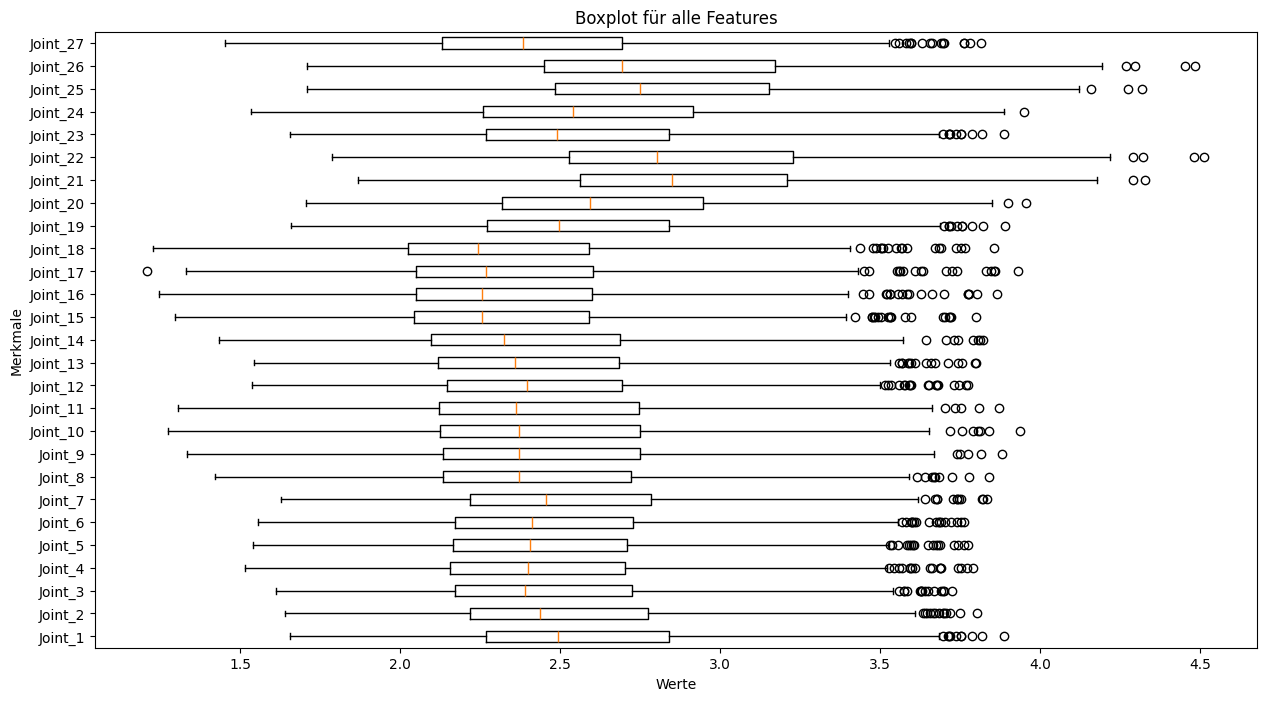

In [ ]:
import matplotlib.pyplot as plt

columns = data_cleaned.columns[1:]

plt.figure(figsize=(15, 8))
plt.boxplot([data_cleaned[col] for col in columns], labels=columns, vert=False)
plt.title("Boxplot für alle Features")
plt.xlabel("Werte")
plt.ylabel("Merkmale")
plt.show()



## split data

In [ ]:
# Zielvariable (y)
y = data_cleaned['Pose Number']

# Merkmale (X)
X = data_cleaned.drop(columns=['Pose Number'])


print(X.head())
print(y.head())


    Joint_1   Joint_2   Joint_3   Joint_4   Joint_5   Joint_6   Joint_7  \
0  3.121613  3.052668  3.021788  3.053974  3.059113  3.051337  3.219006   
1  3.208593  3.010979  2.855522  2.621658  2.660382  2.724627  2.928036   
2  3.366836  3.334915  3.325469  3.413587  3.405159  3.435247  3.418649   
3  3.338407  3.290213  3.178516  3.096993  3.115719  3.098387  3.007955   
4  3.272326  3.263448  3.266838  3.346335  3.332698  3.301210  3.292110   

    Joint_8   Joint_9  Joint_10  ...  Joint_18  Joint_19  Joint_20  Joint_21  \
0  3.372958  3.472464  3.384932  ...  2.623083  3.124164  3.300521  3.627612   
1  2.807246  2.712043  2.653307  ...  2.600510  3.209061  3.651953  4.047569   
2  3.375723  3.412777  3.444327  ...  3.245770  3.369378  3.426765  3.602175   
3  2.897638  2.838784  2.781741  ...  2.722301  3.340754  3.139610  3.457424   
4  3.253292  3.168549  3.118040  ...  3.148293  3.275002  3.379051  3.544199   

   Joint_22  Joint_23  Joint_24  Joint_25  Joint_26  Joint_27  
0  3

## train data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")



Trainingsdaten: (307, 27), Testdaten: (77, 27)


## using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Normalisierte Trainingsdaten:")
print(X_train_scaled[:5])

print("Normalisierte Testdaten:")
print(X_test_scaled[:5])

Normalisierte Trainingsdaten:
[[-1.31565190e-01 -3.03426575e-02  7.57151043e-02  2.79242275e-01
   2.59560111e-01  2.42679398e-01  2.32750180e-01 -1.47526969e-03
   1.18941528e-01 -3.71865939e-02 -9.22782263e-02  2.35566978e-01
   1.65632581e-01 -1.84055224e-02  9.03342706e-02  2.57546026e-01
   8.52697889e-02  2.77604551e-01 -1.32405834e-01 -1.95548057e-01
  -4.55593448e-01 -5.38306207e-01 -1.31209302e-01  6.23519025e-03
  -1.16612509e-03  4.69714004e-02  3.45269259e-01]
 [-2.13645676e-01 -1.54552974e-01 -4.59817592e-02  2.29885093e-01
   1.88882349e-01  2.08421295e-01  6.11279699e-02  1.19241775e-01
   3.06455929e-01  4.83460196e-01  3.55881006e-01  1.84072044e-01
   1.11542592e-01 -1.56850469e-01 -1.93419712e-01 -6.37663720e-02
   8.94715352e-02 -1.37156119e-01 -2.13423355e-01 -8.58220473e-02
  -4.60021736e-03  2.15346412e-02 -2.12972996e-01 -2.90393495e-01
  -3.80637142e-01 -4.79115891e-01  3.20628488e-01]
 [-2.18515886e-01 -4.71743328e-01 -6.78690945e-01 -1.03759008e+00
  -9.82944

# Modell building

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

der Hyperparameter-Optimierung mit GridSearchCV und 5-facher Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
# Cross-Validation durchführen (5-Fold Cross-Validation)
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # cv=5 für 5-Fold

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Durchschnittliche Cross-Validation Genauigkeit: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.64516129 0.62903226 0.62295082 0.62295082 0.6557377 ]
Durchschnittliche Cross-Validation Genauigkeit: 0.6352


In [ ]:

from sklearn.model_selection import GridSearchCV

# Definiere den Parameterbereich für GridSearchCV
param_grid_knn = {'n_neighbors': [ 3, 5, 7, 9]}

# GridSearchCV mit 5-facher Cross-Validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train)

print(f"Beste Parameter (k-NN): {grid_search_knn.best_params_}")
print(f"Beste Genauigkeit (k-NN): {grid_search_knn.best_score_:.2f}")

Beste Parameter (k-NN): {'n_neighbors': 3}
Beste Genauigkeit (k-NN): 0.64


### Evaluate Performance

In [10]:
from sklearn.metrics import classification_report

y_pred_knn = grid_search_knn.predict(X_test_scaled)


print("Klassifikationsbericht für k-NN:")
print(classification_report(y_test, y_pred_knn))

NameError: name 'grid_search_knn' is not defined

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

der Hyperparameter-Optimierung mit GridSearchCV und 5-facher Cross-Validation

In [ ]:
# Definiere den Parameterbereich für GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [2, 4]
}

# GridSearchCV mit 5-facher Cross-Validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=10, n_jobs=-1)


grid_search_rf.fit(X_train_scaled, y_train)


print(f"Beste Parameter (Random Forest): {grid_search_rf.best_params_}")
print(f"Beste Genauigkeit (Random Forest): {grid_search_rf.best_score_:.2f}")



Beste Parameter (Random Forest): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Beste Genauigkeit (Random Forest): 0.67


### Evalute Performance

In [ ]:

y_pred_rf = grid_search_rf.predict(X_test_scaled)

print("Klassifikationsbericht für Random Forest:")
print(classification_report(y_test, y_pred_rf))

Klassifikationsbericht für Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.23      0.21      0.22        14
           2       0.89      0.80      0.84        10
           3       0.78      0.70      0.74        10
           4       0.67      0.86      0.75        14
           5       0.55      0.50      0.52        12

    accuracy                           0.62        77
   macro avg       0.64      0.63      0.63        77
weighted avg       0.62      0.62      0.62        77



## Gradient Boosting Modell

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier()


gb.fit(X_train_scaled, y_train)


y_pred_gb = gb.predict(X_test_scaled)

# Klassifikationsbericht
print("Klassifikationsbericht für Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Klassifikationsbericht für Gradient Boosting:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.40      0.29      0.33        14
           2       0.89      0.80      0.84        10
           3       0.75      0.90      0.82        10
           4       0.69      0.79      0.73        14
           5       0.64      0.58      0.61        12

    accuracy                           0.66        77
   macro avg       0.67      0.68      0.67        77
weighted avg       0.65      0.66      0.65        77



# Visualisation

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vorhersagen für k-NN
y_pred_knn = grid_search_knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Vorhersagen für Random Forest
y_pred_rf = grid_search_rf.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)

y_pred_gb = gb.predict(X_test_scaled)
cm_gb = confusion_matrix(y_test, y_pred_gb)



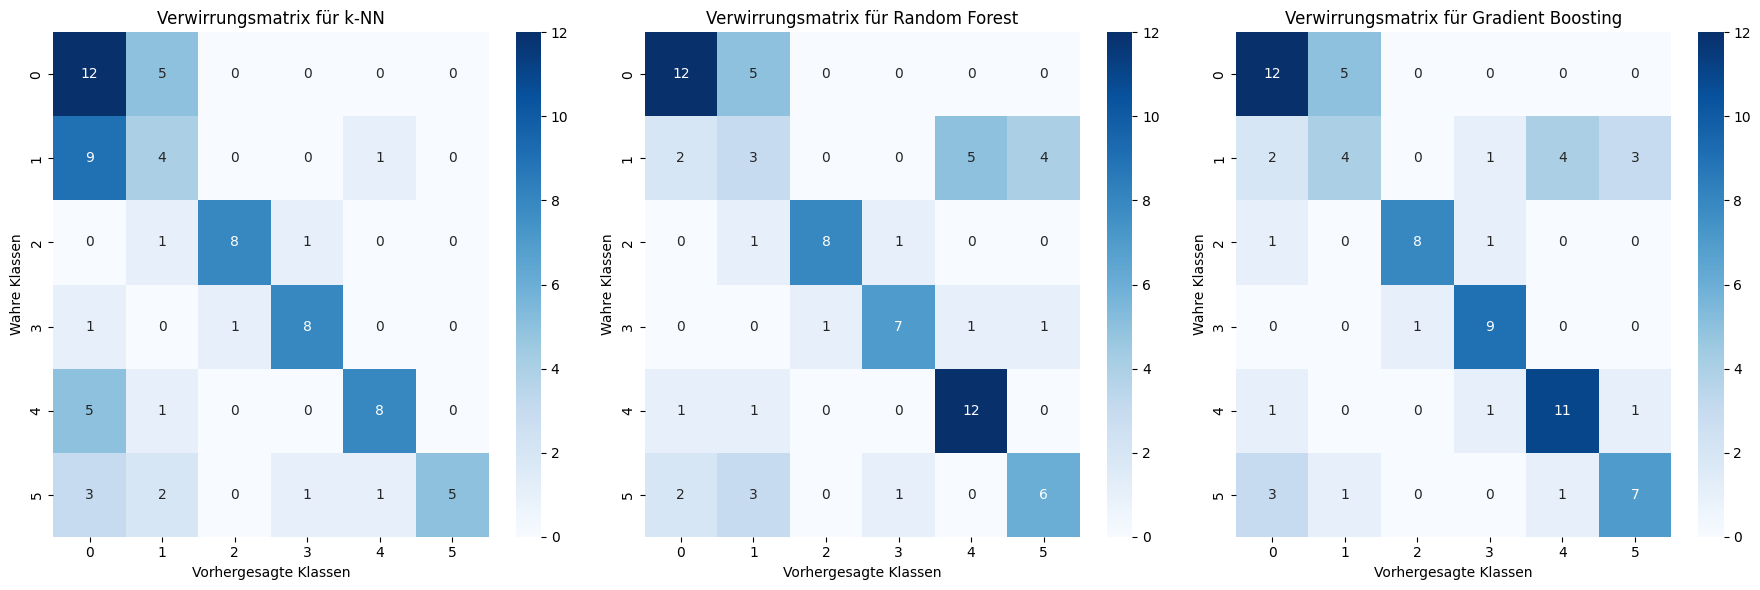

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisierung der Verwirrungsmatrix für k-NN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5], ax=axes[0])
axes[0].set_title('Verwirrungsmatrix für k-NN')
axes[0].set_xlabel('Vorhergesagte Klassen')
axes[0].set_ylabel('Wahre Klassen')

# Visualisierung der Verwirrungsmatrix für Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5], ax=axes[1])
axes[1].set_title('Verwirrungsmatrix für Random Forest')
axes[1].set_xlabel('Vorhergesagte Klassen')
axes[1].set_ylabel('Wahre Klassen')

# Visualisierung der Verwirrungsmatrix für Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5], ax=axes[2])
axes[2].set_title('Verwirrungsmatrix für Gradient Boosting')
axes[2].set_xlabel('Vorhergesagte Klassen')
axes[2].set_ylabel('Wahre Klassen')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisieren der Zielvariable für Mehrklassen-ROC (damit wir die Klasse für jedes Modell separat betrachten)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Berechnen der FPR und TPR für k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), grid_search_knn.predict_proba(X_test_scaled).ravel())
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Berechnen der FPR und TPR für Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), grid_search_rf.predict_proba(X_test_scaled).ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Berechnen der FPR und TPR für Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test_bin.ravel(), gb.predict_proba(X_test_scaled).ravel())
roc_auc_gb = auc(fpr_gb, tpr_gb)


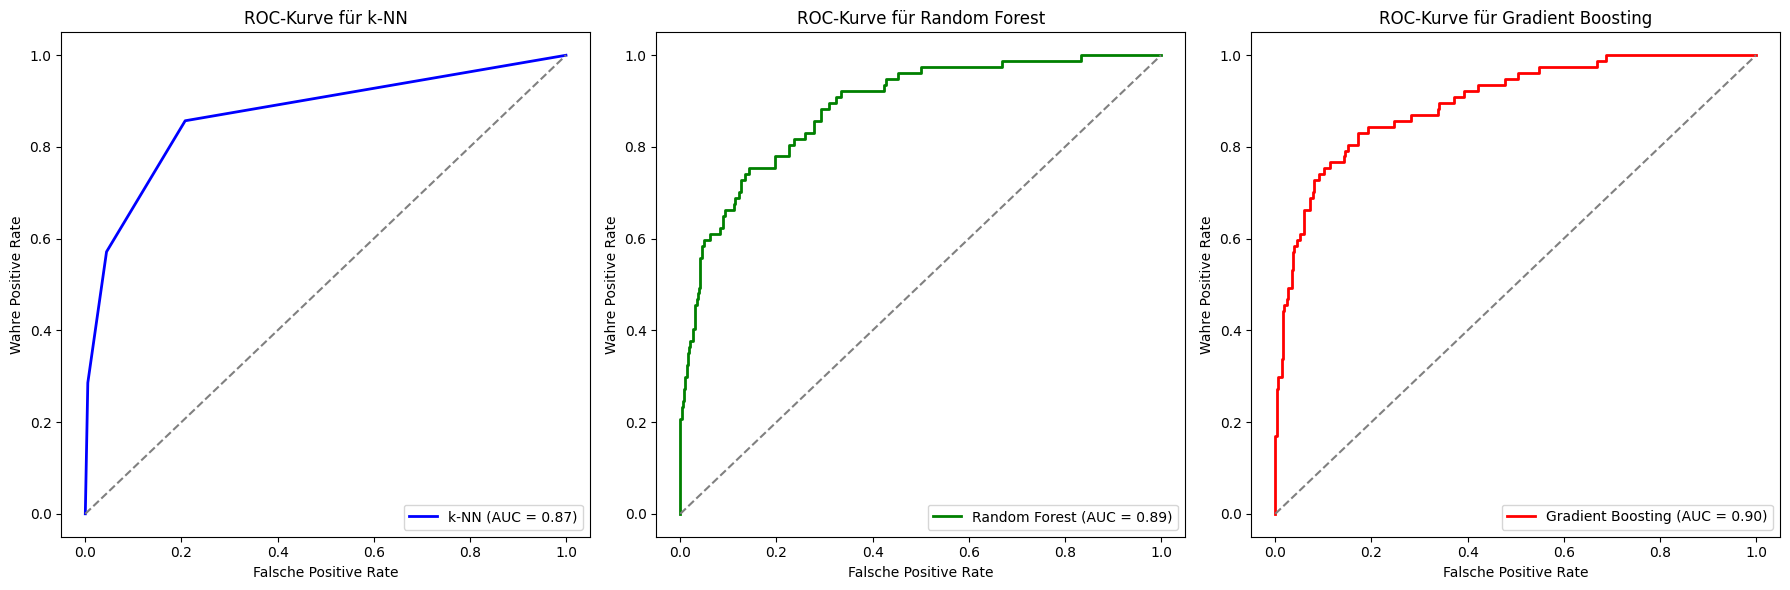

In [ ]:
# Visualisierung der ROC-Kurven für k-NN, Random Forest und Gradient Boosting nebeneinander
plt.figure(figsize=(18, 6))

# ROC-Kurve für k-NN
plt.subplot(131)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-Kurve für k-NN')
plt.xlabel('Falsche Positive Rate')
plt.ylabel('Wahre Positive Rate')
plt.legend(loc="lower right")

# ROC-Kurve für Random Forest
plt.subplot(132)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-Kurve für Random Forest')
plt.xlabel('Falsche Positive Rate')
plt.ylabel('Wahre Positive Rate')
plt.legend(loc="lower right")

# ROC-Kurve für Gradient Boosting
plt.subplot(133)
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-Kurve für Gradient Boosting')
plt.xlabel('Falsche Positive Rate')
plt.ylabel('Wahre Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Modell Speichern

In [ ]:

data_cleaned.to_csv("bereinigter_datensatz.csv", index=False)


In [ ]:
import joblib

joblib.dump(grid_search_knn.best_estimator_, "knn_model.pkl")


['knn_model.pkl']

In [ ]:

joblib.dump(grid_search_rf.best_estimator_, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:

joblib.dump(gb, "gradient_boosting_model.pkl")


['gradient_boosting_model.pkl']